In [1]:
.L src/track_chain.cpp

In [2]:
.L src/load_dataset.cpp

In [3]:
.L src/transform.cpp

In [4]:
.L src/volid.cpp

In [5]:
char const* path {"dataset/AmBe_x1-y1_Run_99.root"};
DataSetHolder dataset = ambeDataSet(path);

In [6]:
auto eventsDf = filterT1Events(dataset.df, 0.01).Filter("is_event");
eventsDf.Count().GetValue()

(const unsigned long long) 86297


In [7]:
// Get all the volid relative to the Gamma chain
auto dfTE= eventsDf.Define(
    "gammaChainVolid",
    "cubeTrackEntry(&T9.pdg, &T9.trackid, &T9.parentid, &T9.initialEkin, &trackid, &volid)"
);

In [8]:
dfTE = dfTE.Define("gammaID", "T9.trackid[T9.pdg == 22 && T9.parentid == 0]")
    .Redefine("gammaID", "gammaID.size()>0 ? gammaID.at(0) : -1");
dfTE = dfTE.Define("gammaVolid", "volid[trackid == gammaID]")
    .Redefine("gammaVolid", "gammaVolid.size() > 0? gammaVolid.at(0) : -1");
// exclude invalid volid
dfTE = dfTE.Filter("gammaVolid != -1");

In [9]:
dfTE = dfTE.Define("xDist", "ROOT::VecOps::Map(gammaChainVolid, getCubeX) - getCubeX(gammaVolid)");
dfTE = dfTE.Define("yDist", "ROOT::VecOps::Map(gammaChainVolid, getCubeY) - getCubeY(gammaVolid)");
dfTE = dfTE.Define("zDist", "ROOT::VecOps::Map(gammaChainVolid, getCubeZ) - getCubeZ(gammaVolid)");

# Plot the abolute distance

In [10]:
dfTE = dfTE.Define("HammingDist", "xDist + yDist + zDist");

In [11]:
dfTE = dfTE.Define("EuclidDist", "ROOT::VecOps::sqrt(xDist * xDist + yDist * yDist + zDist * zDist)");

In [12]:
auto mmax = [](int dx, int dy, int dz){return std::max({dx, dy, dz});};

In [13]:
dfTE = dfTE.Define("NeighborhoodDist", "ROOT::VecOps::Map(xDist, yDist, zDist, mmax)");

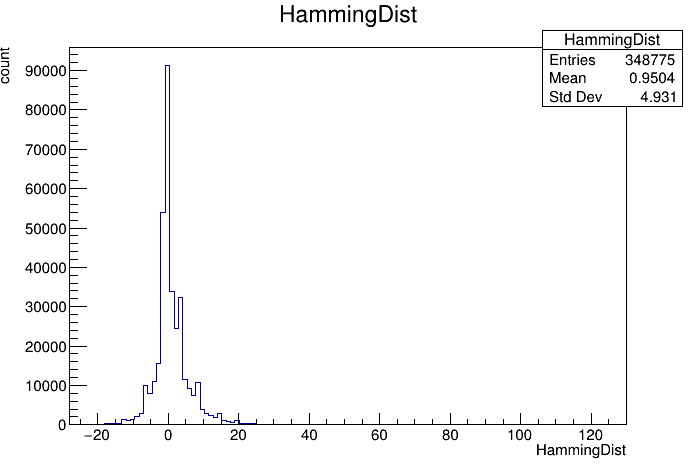

In [14]:
TCanvas c;
auto hist = dfTE.Histo1D("HammingDist")->DrawClone();
c.Draw();

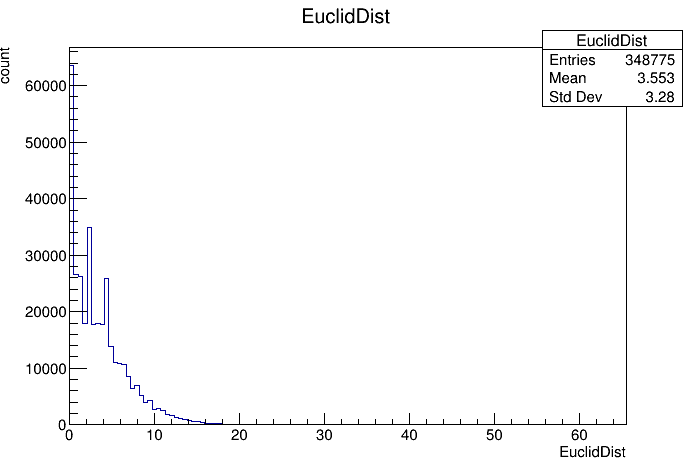

In [15]:
TCanvas c;
auto hist = dfTE.Histo1D("EuclidDist")->DrawClone();
c.Draw();

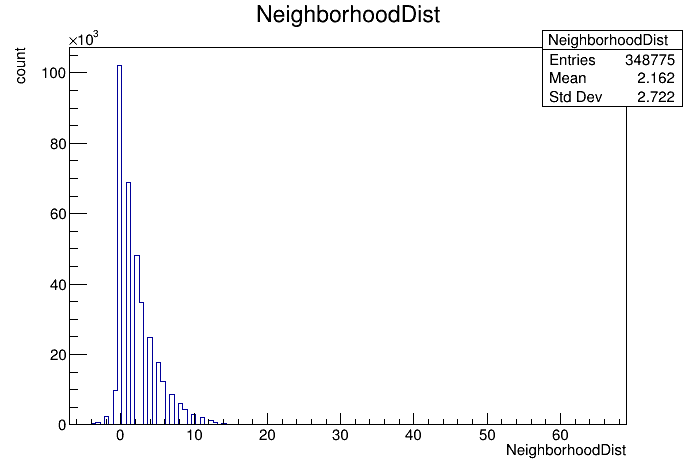

In [16]:
TCanvas c;
auto hist = dfTE.Histo1D("NeighborhoodDist")->DrawClone();
c.Draw();

In [17]:
dfTE = dfTE.Define("maxHammingDist", "ROOT::VecOps::Max(ROOT::VecOps::abs(HammingDist))");

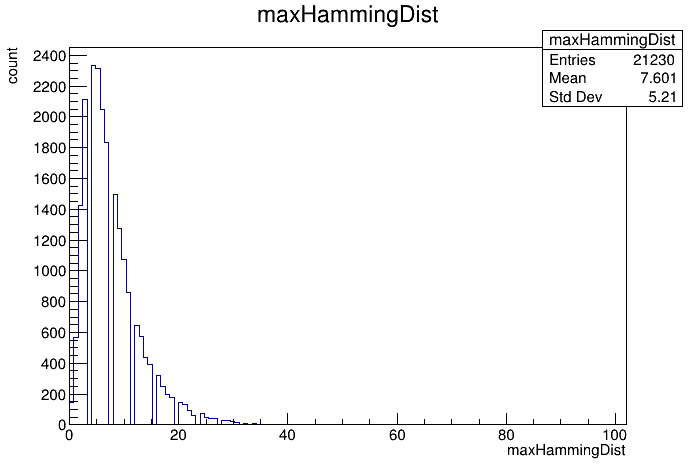

In [18]:
TCanvas c;
auto hist = dfTE.Histo1D("maxHammingDist")->DrawClone();
c.Draw();

In [19]:
dfTE = dfTE.Define("maxEuclidDist", "ROOT::VecOps::Max(EuclidDist)");

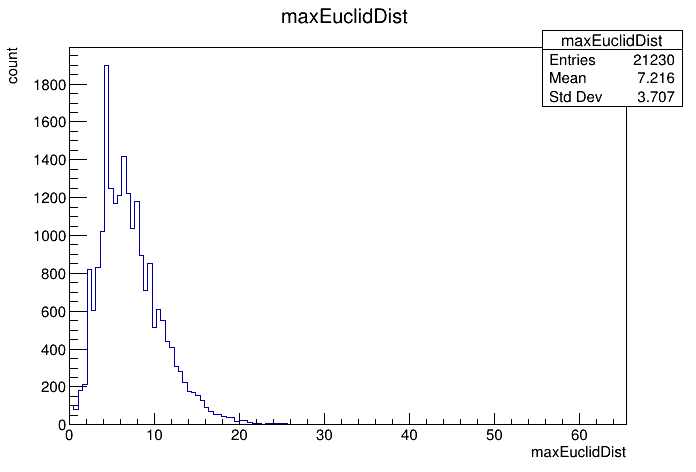

In [20]:
TCanvas c;
auto hist = dfTE.Histo1D("maxEuclidDist")->DrawClone();
c.Draw();

In [21]:
dfTE = dfTE.Define("maxNeighborhoodDist", "ROOT::VecOps::Max(ROOT::VecOps::abs(NeighborhoodDist))");

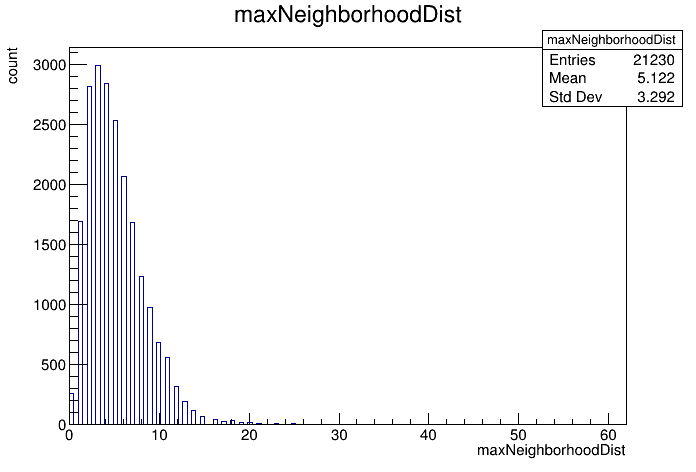

In [22]:
TCanvas c;
auto hist = dfTE.Histo1D("maxNeighborhoodDist")->DrawClone();
c.Draw();

# Taking in count the energy as limit

In [23]:
// Back with eventsDf wich we apply filter on t5
auto dflimit = eventsDf.Redefine("volid", "volid[edep_pvt > 0.00]");
dflimit = dflimit.Redefine("trackid", "trackid[edep_pvt > 0.00]");
dflimit = dflimit.Redefine("edep_pvt", "edep_pvt[edep_pvt > 0.00]");

In [24]:
// Get all the volid relative to the Gamma chain
auto dfTE2 = dflimit.Define(
    "gammaChainVolid",
    "cubeTrackEntry(&T9.pdg, &T9.trackid, &T9.parentid, &T9.initialEkin, &trackid, &volid)"
);

In [25]:
dfTE2 = dfTE2.Define("gammaID", "T9.trackid[T9.pdg == 22 && T9.parentid == 0]")
    .Redefine("gammaID", "gammaID.size()>0 ? gammaID.at(0) : -1");
dfTE2 = dfTE2.Define("gammaVolid", "volid[trackid == gammaID]")
    .Redefine("gammaVolid", "gammaVolid.size() > 0? gammaVolid.at(0) : -1");
// exclude invalid volid
dfTE2 = dfTE2.Filter("gammaVolid != -1");

In [26]:
dfTE2 = dfTE2.Define("xDist", "ROOT::VecOps::Map(gammaChainVolid, getCubeX) - getCubeX(gammaVolid)");
dfTE2 = dfTE2.Define("yDist", "ROOT::VecOps::Map(gammaChainVolid, getCubeY) - getCubeY(gammaVolid)");
dfTE2 = dfTE2.Define("zDist", "ROOT::VecOps::Map(gammaChainVolid, getCubeZ) - getCubeZ(gammaVolid)");

In [27]:
dfTE2 = dfTE2.Define("HammingDist", "xDist + yDist + zDist");

In [28]:
dfTE2 = dfTE2.Define("EuclidDist", "ROOT::VecOps::sqrt(xDist * xDist + yDist * yDist + zDist * zDist)");

In [29]:
dfTE2 = dfTE2.Define("NeighborhoodDist", "ROOT::VecOps::Map(xDist, yDist, zDist, mmax)");

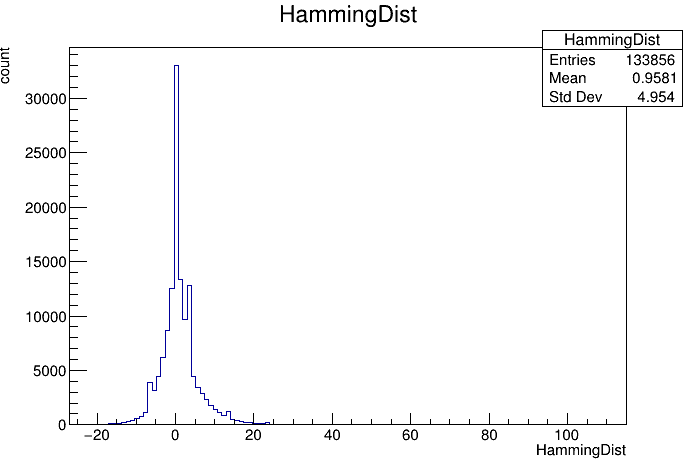

In [30]:
TCanvas c;
auto hist = dfTE2.Histo1D("HammingDist")->DrawClone();
c.Draw();